### Unsupervised Learning(Denetimsiz Öğrenme)

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

#### K-Means(K-Ortalamalar) Algorithm:

In [2]:
df = pd.read_csv("C:\\Users\\Monster\\Desktop\\dataa\\csv_files\\USArrests.csv", index_col=0)

df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [3]:
# eksik değer var mı kontrol edelim
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


- Uzaklık temelli ve gradient descent temelli yöntemlerin kullanımında **değişkenlerin standartlaştırılması** önem arz etmektedir.
- K-means algoritması da uzaklık temelli bir yöntem olduğundan değişkenleri standartlaştırmak gerekiyor.

In [6]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df) #standartlaştırılmış hali(numpy array'ine dönüştüler)
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [7]:
# bağımlı değişken yok zaten burda, bağımsız değişkenlerimiz yani X'de df'e karşılık geliyor
kmeans = KMeans(n_clusters=4, random_state=17, n_init='auto').fit(df)
kmeans.get_params()

C:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'auto',
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [8]:
kmeans.n_clusters

4

In [9]:
# kümelerin merkezlerine bakalım
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [10]:
# kümelerin etiketleri
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [11]:
# sum of squared distances(ssd,ssr) of samples to their closest cluster center
kmeans.inertia_

3.683456153585913

#### Optimum Küme Sayısının Belirlenmesi:

In [12]:
# optimum küme sayısını belirleyebilmek için ssd(sum of squared distances) değerlerinin incelenmesi lazım

kmeans = KMeans() # boş bir k-means nesnesi oluşturuyoruz
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)

C:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

In [13]:
ssd

[13.184122550256443,
 6.5968938679461955,
 5.01849999148911,
 3.7082199086827208,
 3.570951517892059,
 3.000994134730175,
 2.6433999432104507,
 2.371510457664508,
 2.499820561682922,
 2.308153827365304,
 2.0584867756596736,
 1.6650876895535378,
 1.4937332536746255,
 1.372216168145086,
 1.2878602045402758,
 1.0857530349487747,
 1.1846084772859053,
 1.002211982554655,
 0.9898054850389629,
 0.9291690463003417,
 0.8997932330804119,
 0.8740686759618626,
 0.7135370705235221,
 0.6838919539491305,
 0.6052613798233566,
 0.5463056099019374,
 0.5227790802984903,
 0.48173050686556207,
 0.4547127539084843]

In [14]:
len(ssd)

29

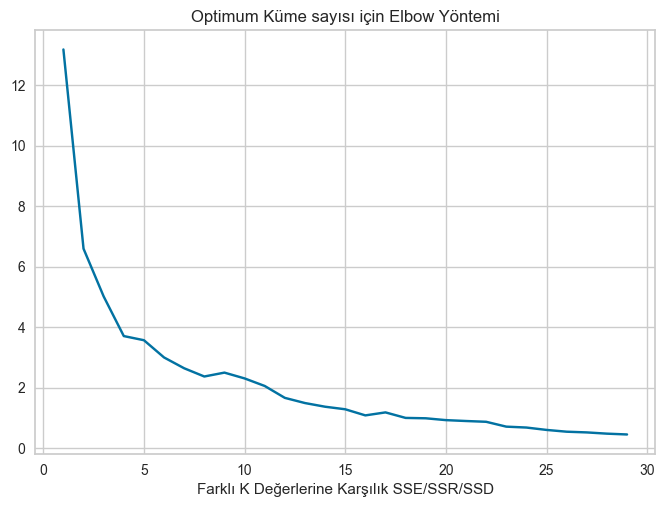

In [15]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD")
plt.title("Optimum Küme sayısı için Elbow Yöntemi")
plt.show()

C:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

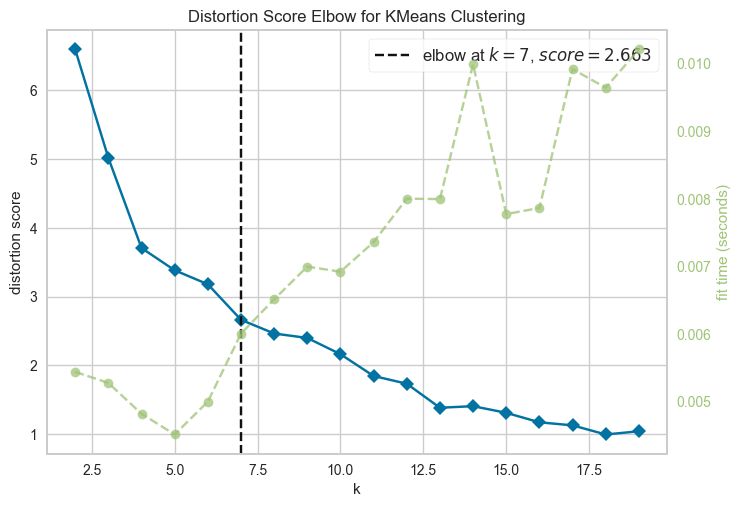

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# optimum küme sayısını ,optimum noktayı bulur, yani optimum küme sayısını bulur
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [17]:
# optimum küme sayısı
elbow.elbow_value_

7

#### Final Cluster'ların Oluşturulması:

In [18]:
# belirlediğimiz optimum küme sayısına göre modeli tekrar kuralım
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

C:\Users\Monster\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
print("Küme sayısı:", kmeans.n_clusters)
print("Küme merkezleri:", kmeans.cluster_centers_)
print("Küme etiketleri:", kmeans.labels_)

Küme sayısı: 7
Küme merkezleri: [[0.11370482 0.09246575 0.25847458 0.08074935]
 [0.60374833 0.78348554 0.71751412 0.75222509]
 [0.42319277 0.33304795 0.36864407 0.24935401]
 [0.35421687 0.37123288 0.65762712 0.37829457]
 [0.63855422 0.64954338 0.86440678 0.4625323 ]
 [0.83562823 0.70645793 0.37772397 0.37172388]
 [0.18942436 0.20053272 0.73446328 0.20155039]]
Küme etiketleri: [5 1 1 2 1 1 6 3 1 5 6 0 4 3 0 3 2 5 0 1 6 1 6 5 3 2 6 1 0 3 1 4 5 0 3 3 3
 6 6 5 0 5 4 6 0 3 3 0 6 2]


In [20]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [21]:
clusters_kmeans = kmeans.labels_

df = pd.read_csv("C:\\Users\\Monster\\Desktop\\dataa\\csv_files\\USArrests.csv", index_col=0)


# dataframe'e etiketleri ekliyoruz
df["cluster"] = clusters_kmeans

df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,5
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [22]:
# etiketlerde 0 olmasını istemezsek değiştirebiliriz
df["cluster"] = df["cluster"] + 1

df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,6
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2


In [23]:
# 5 numaralı cluster'da hangi eyaletler var inceleyelim
df[df["cluster"]==5]

,Murder,Assault,UrbanPop,Rape,cluster
Illinois,10.4,249,83,24.0,5
New York,11.1,254,86,26.1,5
Texas,12.7,201,80,25.5,5


In [24]:
df.groupby("cluster").agg(["count","mean","median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1            8   2.687500    2.2       8   72.000000   69.0        8   
2            9  10.822222   11.3       9  273.777778  276.0        9   
3            4   7.825000    7.8       4  142.250000  135.0        4   
4           10   6.680000    6.9      10  153.400000  153.5       10   
5            3  11.400000   11.1       3  234.666667  249.0        3   
6            7  14.671429   14.4       7  251.285714  249.0        7   
7            9   3.944444    3.4       9  103.555556  106.0        9   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        47.250000   48.0     8  10.425000  10.35  
2        74.333333   78.0     9  36.411111  35.10  
3        53.750000   52.5     4  16.950000  16.35  
4        70.800000   69.0    10  21.940000  20.85  
5        83.000000   83.0     3  25.200000  25.50  
6        54.285714   58.0     7  21.685714  22.20  
7        75.333333   77.0     9  15.100000  14.90

In [25]:
df.to_csv("clusters.csv")

#### Hierarchical Clustering(Hiyerarşik Kümeleme Analizi):

- Amaç gözlemleri birbirlerine olan benzerliklerine göre alt kümelere ayırmaktır. Burda bu kümeleme işlemi hiyerarşik bir şekilde gerçekleştirilir. Agglomerative birleştirici ve disisive bölümleyici. Yukarı doğru birleştirici ya da aşağıya doğru bölümleyici şekilde çalışır hiyerarşik kümeleme.

In [26]:
df = pd.read_csv("C:\\Users\\Monster\\Desktop\\dataa\\csv_files\\USArrests.csv", index_col=0)

In [27]:
sc = MinMaxScaler((0, 1))
df = sc.fit_transform(df)

In [28]:
# agglomerative birleştirici, linkage yöntemi,fonksiyonu öklit uzaklığına göre gözlem birimlerini kümelere ayırıyor
hc_average = linkage(df, "average")

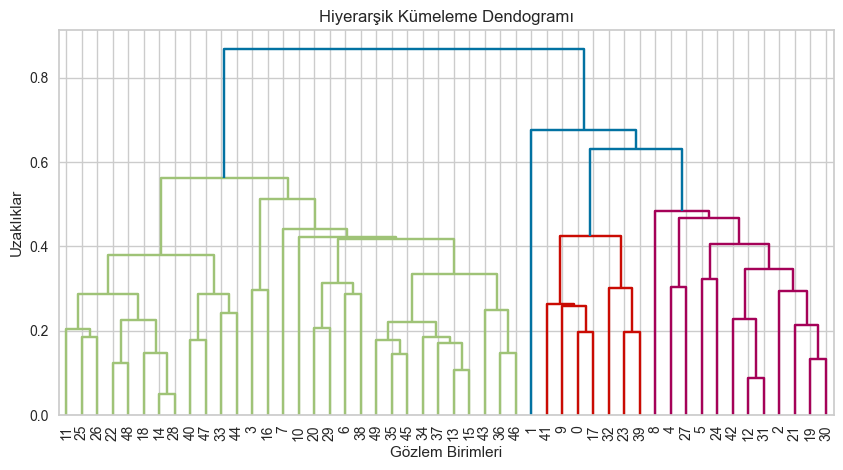

In [29]:
plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()

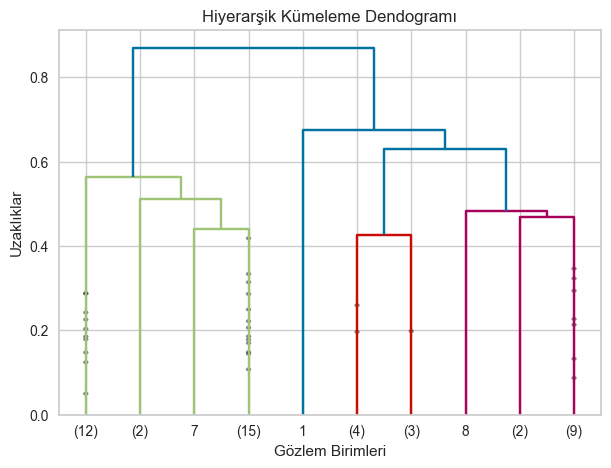

In [30]:
# daha az gözlem birimi görmek istersek grafikte
plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

#### Küme Sayısını Belirlemek:

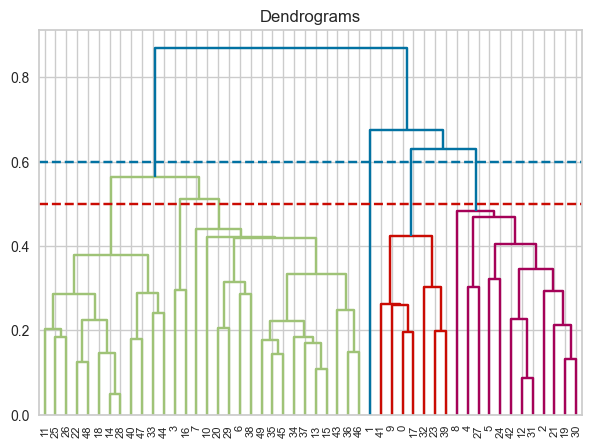

In [31]:
plt.figure(figsize=(7, 5))
plt.title("Dendrograms")
dend = dendrogram(hc_average)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axhline(y=0.6, color='b', linestyle='--')
plt.show()

In [32]:
################################
# Final Modeli Oluşturmak
################################

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

clusters = cluster.fit_predict(df)

In [33]:
df = pd.read_csv("C:\\Users\\Monster\\Desktop\\dataa\\csv_files\\USArrests.csv", index_col=0)

df["hi_cluster_no"] = clusters # hierarchical cluster'ların nosunu dataframe'e ekleyelim

In [34]:
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,3
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


In [35]:
df["kmeans_cluster_no"] = clusters_kmeans

df["kmeans_cluster_no"] = df["kmeans_cluster_no"]  + 1

In [36]:
df.head()

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,4,6
Alaska,10.0,263,48,44.5,3,2
Arizona,8.1,294,80,31.0,2,2
Arkansas,8.8,190,50,19.5,1,3
California,9.0,276,91,40.6,2,2


In [37]:
################################
# Principal Component Analysis
################################

# bu veri setindeki asıl amaç maaş tahmini gerçekleştirmektir
df = pd.read_csv("C:\\Users\\Monster\\Desktop\\dataa\\csv_files\\hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [38]:
# veri setindeki sayısal değişkenleri(sütunları) almak ve salary sütununu da devre dışı bırakmak için(unsupervised old. için)
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]

df[num_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [39]:
# artık yeni dataframe'imiz 
df = df[num_cols]
df.dropna(inplace=True) # eksik veri varsa onları atıyoruz veri setinden 

In [40]:
df.shape

(322, 16)

In [41]:
# şu anda elimizdeki veride 16 tane değişken yani 16 sütun var
# amacımız çok değişkenli verinin daha az değişkenle ifade edilmesi
df = StandardScaler().fit_transform(df)

pca = PCA()
pca_fit = pca.fit_transform(df)

In [42]:
# değişkenlerin açıkladıkları varyans(bilgi-çeşitlilik) oranları bilgisi
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [43]:
# kümülatif varyanslara bakalım
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

In [44]:
################################
# Optimum Bileşen Sayısı
################################

pca = PCA().fit(df)

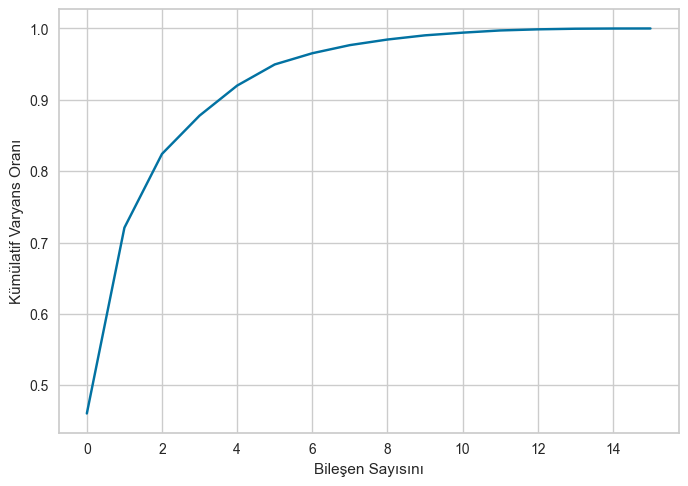

In [45]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Bileşen Sayısını")
plt.ylabel("Kümülatif Varyans Oranı")
plt.show()

In [46]:
################################
# Final PCA'in Oluşturulması
################################

# yukarıdaki grafikten en uygun bileşen sayısını 3 olarak seçiyoruz, en keskin geçiş orada olmuş diyebiliriz
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

#### BONUS: Principal Component Regression(Temel Bileşen Regresyon Modeli)

In [48]:
df = pd.read_csv("C:\\Users\\Monster\\Desktop\\dataa\\csv_files\\hitters.csv")

df.shape

(322, 20)

In [49]:
len(pca_fit)

322

In [50]:
# numerik sütunları seçelim
num_cols = [col for col in df.columns if df[col].dtypes != "O" and "Salary" not in col]
len(num_cols)

16

In [51]:
# num_cols'un dışında kalan yani numerik olmayan değişkenleri seçiyoruz
others = [col for col in df.columns if col not in num_cols]

others

['League', 'Division', 'Salary', 'NewLeague']

In [52]:
# daha önce pca ile boyut indirgemesi yaptığımız bileşenleri getirelim
# bu bileşenleri bir dataframe'e çevirelim ve PC1,PC2,PC3 şeklinde adlandıralım
pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]).head()

,PC1,PC2,PC3
0,-3.240106,0.253173,0.776066
1,0.245488,-1.302951,0.118040
2,0.603883,2.617002,-0.698183
3,3.591276,-0.547821,-1.049022
4,-2.264528,0.698898,-1.290536


In [53]:
df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


In [54]:
# 16 tane sayısal değişken vardı onları 3 değişkene indirgedik PCA ile, şimdi bu indirgenmiş değişkenler 
# üzerine regresyon modeli inşa edilecek

# bu iki dataframe'i birleştirelim
final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]),
                      df[others]], axis=1)
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,0.253173,0.776066,A,E,NaN,A
1,0.245488,-1.302951,0.118040,N,W,475.0,N
2,0.603883,2.617002,-0.698183,A,W,480.0,A
3,3.591276,-0.547821,-1.049022,N,E,500.0,N
4,-2.264528,0.698898,-1.290536,N,E,91.5,N


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# final dataframe'de kategorik değişkenler bulunmakta, model kurabilmemiz için bunları da label encoding uygulayarak 1-0 sınıflarına 
# dönüştürmemiz gerekiyor, hepsi iki sınıflı değişkenler zaten
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

for col in ["NewLeague", "Division", "League"]:
    label_encoder(final_df, col)

final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,0.253173,0.776066,0,0,NaN,0
1,0.245488,-1.302951,0.118040,1,1,475.0,1
2,0.603883,2.617002,-0.698183,0,1,480.0,0
3,3.591276,-0.547821,-1.049022,1,0,500.0,1
4,-2.264528,0.698898,-1.290536,1,0,91.5,1


In [57]:
# salary değişkenine dokunmuyoruz zaten, NaN değerleri sorun çıkarabilir bu nedenle onları atıyoruz
final_df.dropna(inplace=True)

In [59]:
y = final_df["Salary"]
X = final_df.drop(["Salary"], axis=1)

lm = LinearRegression() # boş linear regresyon model nesnesi
rmse = np.mean(np.sqrt(-cross_val_score(lm, X, y, cv=5, scoring="neg_mean_squared_error")))

rmse

345.6021106351967

In [60]:
y.mean()

535.9258821292775

- y.mean() sonucu ile rmse skorunu karşılaştırınca yaptığımız radikal işleme göre iyi bir sonuç elde ettiğimizi söyleyebiliriz.
- En başta 16 sayısal değişken varken birden 3 sayısal değişkene indirgedik dolayısıyla bu işlem sırasında bir miktar bilgi kaybı yaşandı.

In [62]:
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))

rmse

376.6941910392092

In [63]:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [64]:
# GridSearchCV
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

cart_best_grid.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


{'max_depth': 3, 'min_samples_split': 19}

In [65]:
rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))

rmse

330.1964109339104

#### BONUS: PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme

In [66]:
################################
# Breast Cancer
################################

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

df = pd.read_csv("C:\\Users\\Monster\\Desktop\\dataa\\csv_files\\breast_cancer.csv")

In [67]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [68]:
y = df["diagnosis"] # bağımlı değişken
X = df.drop(["diagnosis", "id"], axis=1) # bağımsız değişkenler

In [69]:
# çok boyutlu veriyi görselleştirmek için 2 boyuta indirgememiz lazım

def create_pca_df(X, y):
    X = StandardScaler().fit_transform(X) # bağımsız değişkenleri standartlaştırma
    pca = PCA(n_components=2) # 2 bileşene indirgeme
    pca_fit = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_fit, columns=['PC1', 'PC2'])
    final_df = pd.concat([pca_df, pd.DataFrame(y)], axis=1)
    return final_df

pca_df = create_pca_df(X, y)
pca_df.head()

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


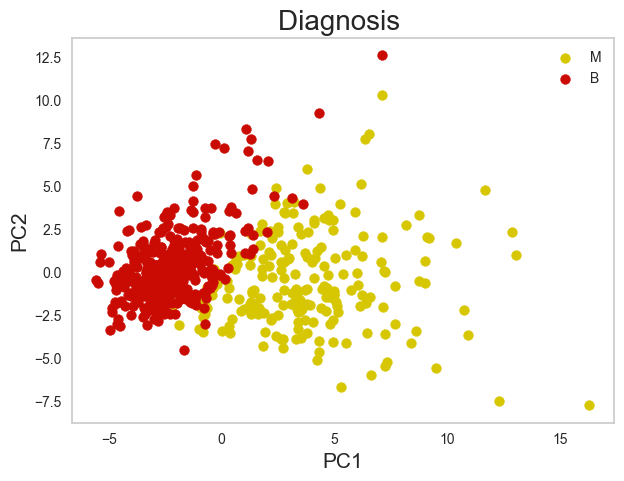

In [70]:
# iki boyuta indirgediğimiz değişkenleri görselleştirelim

# genellenebilir, farklı veri setlerine uygulanabilir bir fonksiyon
def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique()) # target'ın eşsiz sınıflarını bulup bir listede tutacak
    colors = random.sample(['r', 'b', "g", "y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(pca_df, "diagnosis")

#### Iris Dataset(plot_pca fonksiuonunu Iris veri seti için uygulayalım)

In [72]:
import seaborn as sns
df = sns.load_dataset("iris")

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


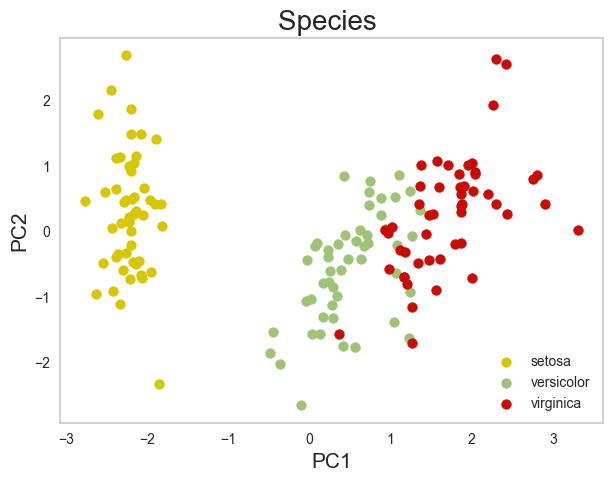

In [73]:
# bu veri setinde 3 çiçek çeşidi var yani 3 sınıflı bir sınıflandırma yapılacak

y = df["species"]
X = df.drop(["species"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "species")

#### For Diabetes Dataset

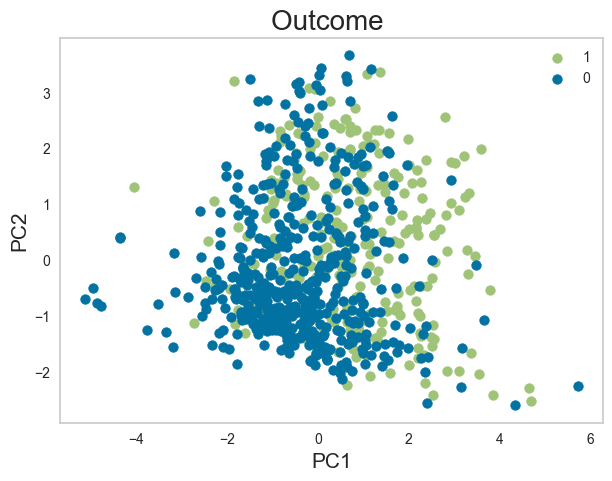

In [74]:
df = pd.read_csv("C:\\Users\\Monster\\Desktop\\dataa\\csv_files\\diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "Outcome")

- Diabetes veri setinde sınıflarını ayırt etmenin diğer veri setlerine göre daha zor olduğunu gözlemliyoruz.